<a href="https://colab.research.google.com/github/Abhiramborige/Workshops/blob/master/Digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ANN = Artificial Neural Networks
# activation function is denoted by a
# a=w1x1+w2x2+...wnxn
# y^=activation function(a) (prediction)
# activation function can be relu, sigmoid, softmax, tanh
# RELU = Rectified Linear Unit
# these are any non-linear functions, these increase non-linearity of data
# non-linearity comes working with images, xray, ctscan, apeeches, audio, videos
# every neural network has input layer and output layer and hidden layer
# if the count of hidden layers is 10, then its a DNN (Deep Neural network)

In [ ]:
# Image classification using MNIST data set (height and width is 28)
# Images of Hand written digits
# How do we determine the number of layers to use and number of neurons in each layer comes under hyperparameter
# we have train 60000 images which are in MNIST
# Modified National Institute of Standards and Technology database
# testing dataset contain 10000 images
# keras is high level API of tensor flow 

In [ ]:
import keras
from keras.datasets import mnist

In [ ]:
mnist.load_data?

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# to load data from mnist

11493376/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train.shape
# 60000 images and 28px 28px is size of image

(60000, 28, 28)

In [ ]:
x_test.shape
# black and white images

(10000, 28, 28)

In [ ]:
y_train.shape
# a vector of 60000 numbers

(60000,)

In [ ]:
y_test.shape
# a vector of 60000 numbers

(10000,)

In [ ]:
import matplotlib.pyplot as plt
def plot_image(img):
  #(784,) =>(28,28)
  # we have to convert first for smooth excecution
  img=img.reshape(28,28)
  plt.imshow(img,cmap="gray")
  # cmap absence gives random color

In [ ]:
x_train[0]
# it gives color scheme 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

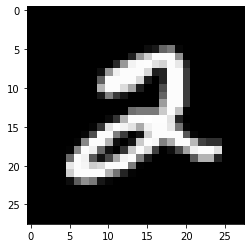

In [ ]:
plot_image(x_train[5])

In [ ]:
print(y_train[5])
# gives the number

2


In [ ]:
# neuron cant take (60000,28,28) matrix
# so convert into (60000,784)
# relu is max(0,Z)
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
# one hot encoding/ to-categorical
# given an array of numbers [1 2 3 2 3 1]
# the encoding is given by:
'''
[1 2 3]
-------
[1 0 0]
[0 1 0]
[0 0 1]
[0 1 0]
[0 0 1]
[1 0 0]
'''
# the number of columns are the number of unique values


'\n[1 2 3]\n-------\n[1 0 0]\n[0 1 0]\n[0 0 1]\n[0 1 0]\n[0 0 1]\n[1 0 0]\n'

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10, 2)
(10000, 10, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()
# creates a sequential layes one by one
# the below is input layer

In [ ]:
model.add( Dense(units=32, activation='relu', input_shape=(784,)) )
# dense layers make each neuron of one sequential layes to other
# units are number of neurons in a single layer (generally powers of 2)
# from here no need to give shape, these are hidden layers
model.add( Dense(units=64,activation="relu") ) 
model.add( Dense(units=128,activation="relu") )
model.add( Dense(units=32,activation="relu") )
# the below is output layer
# have to predict digits from 0-9 (10 numbers) so 10 neurons in output layer
# these are number of unique classes or outputs
model.add( Dense(units=10,activation="softmax") )
'''
        #neurons    activation
input                 relu - best
output                0/1 - sigmoid
                    multiple - softmax
softmax, sigmoid are generally used in output layer
relu is used everywhere generally
'''

'\n        #neurons    activation\ninput                 relu - best\noutput                0/1 - sigmoid\n                    multiple - softmax\nsoftmax, sigmoid are generally used in output layer\nrelu is used everywhere generally\n'

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 40,010
Trainable params: 40,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
# adam is type of algorithm which minimize the function
# crossentropy is used in classification
# categorical is for multiclass classification
# if only 0/1 then binary_crossentropy
# metrics is we have to measure accuracy
# learning rate is related to optimizer

In [ ]:
# train model
model.fit(x=x_train,y=y_train,epochs=10, validation_data=(x_test,y_test))
# epochs are number of iterations

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.7663 - accuracy: 0.8196 - val_loss: 0.3204 - val_accuracy: 0.9085
Epoch 2/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2814 - accuracy: 0.9211 - val_loss: 0.2307 - val_accuracy: 0.9367
Epoch 3/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2189 - accuracy: 0.9374 - val_loss: 0.1997 - val_accuracy: 0.9422
Epoch 4/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.1846 - accuracy: 0.9473 - val_loss: 0.1763 - val_accuracy: 0.9517
Epoch 5/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.1594 - accuracy: 0.9549 - val_loss: 0.1636 - val_accuracy: 0.9560
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.1417 - accuracy: 0.9585 - val_loss: 0.1652 - val_accuracy: 0.9544
Epoch 7/10
60000/60000 [==============================] - 4s 64us/st

In [ ]:
# accuracy is increased in every iteration
# trained effectively as epoch is increased
x_test[780]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 202,
       231, 104,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 133, 243, 254, 219, 154,  44,  89,  36,  36,  36,  23,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  56, 171, 245, 254, 254, 254, 254, 25

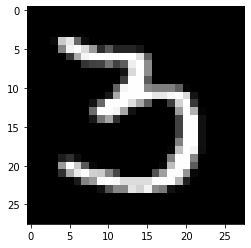

In [ ]:
plot_image(x_test[780])

In [ ]:
# lets ask model
model.predict_classes(x_test[780].reshape(1,784))

array([3])

In [ ]:
x_test[780].shape

(784,)

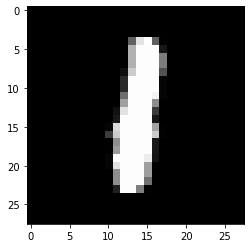

In [ ]:
plot_image(x_test[8090])

In [ ]:
model.predict_classes(x_test[8090].reshape(1,784))

array([1])

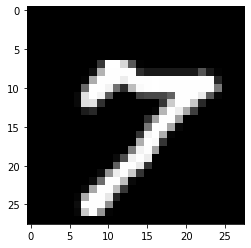

In [ ]:
plot_image(x_test[9000])

In [ ]:
model.predict_classes(x_test[9000].reshape(1,784))
# we have to give input in the format (_,784) 
# _ cant be 784
# we have reshaped as the table shows the shape is (none,32 or 64 or..)


array([7])

In [ ]:
# hyperparameter is related to count and type units, activation function, layers, epochs
# load-img and cv2.resize(784) and some other functions are to be used
# upload the paint .png file in the file directory and use the functions to predict the number
